## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Step 2: Create the Dataset

In [2]:
# Set the random seed for reproducibility
np.random.seed()

# Create a synthetic dataset
data = {
    'product_id': range(1, 21),
    'product_name': [f'Product {i}' for i in range(1, 21)],
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Sports'], 20),
    'units_sold': np.random.poisson(lam=20, size=20),  # Poisson distribution for sales
    'sale_date': pd.date_range(start='2023-01-01', periods=20, freq='D')
}

sales_data = pd.DataFrame(data)

# Display the first few rows of the dataset
print("Sales Data:")
print(sales_data)

Sales Data:
    product_id product_name     category  units_sold  sale_date
0            1    Product 1     Clothing          15 2023-01-01
1            2    Product 2     Clothing          19 2023-01-02
2            3    Product 3       Sports          25 2023-01-03
3            4    Product 4  Electronics          14 2023-01-04
4            5    Product 5  Electronics          28 2023-01-05
5            6    Product 6         Home          20 2023-01-06
6            7    Product 7       Sports          19 2023-01-07
7            8    Product 8  Electronics          17 2023-01-08
8            9    Product 9         Home          21 2023-01-09
9           10   Product 10         Home          24 2023-01-10
10          11   Product 11       Sports          17 2023-01-11
11          12   Product 12  Electronics          19 2023-01-12
12          13   Product 13       Sports          20 2023-01-13
13          14   Product 14         Home          17 2023-01-14
14          15   Product 15 

In [3]:
# Save the DataFrame as a CSV file
sales_data.to_csv('sales_data.csv', index=False)

In [4]:
# path location
import os
os.getcwd() 

'c:\\Users\\Admin\\AVSCODE\\STATISTICS'

## Step 3: Descriptive Statistics

In [5]:
# Descriptive statistics
descriptive_stats = sales_data['units_sold'].describe()

# Display descriptive statistics
print("\nDescriptive Statistics for Units Sold:")
print(descriptive_stats)

# Additional statistics
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()

# Group by category and calculate total and average sales
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum', 'mean', 'std']).reset_index()
category_stats.columns = ['Category', 'Total Units Sold', 'Average Units Sold', 'Std Dev of Units Sold']

# Display the results
print("\nStatistical Analysis:")
print(f"Mean Units Sold: {mean_sales}")
print(f"Median Units Sold: {median_sales}")
print(f"Mode Units Sold: {mode_sales}")
print(f"Variance of Units Sold: {variance_sales}")
print(f"Standard Deviation of Units Sold: {std_deviation_sales}")
print("\nCategory Statistics:")
print(category_stats)


Descriptive Statistics for Units Sold:
count    20.000000
mean     20.000000
std       4.129483
min      14.000000
25%      17.000000
50%      19.500000
75%      23.000000
max      28.000000
Name: units_sold, dtype: float64

Statistical Analysis:
Mean Units Sold: 20.0
Median Units Sold: 19.5
Mode Units Sold: 17
Variance of Units Sold: 17.05263157894737
Standard Deviation of Units Sold: 4.129483209670112

Category Statistics:
      Category  Total Units Sold  Average Units Sold  Std Dev of Units Sold
0     Clothing                51              17.000               2.000000
1  Electronics               163              20.375               5.578978
2         Home                82              20.500               2.886751
3       Sports               104              20.800               3.193744


## Step 4: Inferential Statistics

In [ ]:
# Confidence Interval for the mean of units sold
confidence_level = 0.95
degrees_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

# t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the Mean of Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units Sold:
(np.float64(18.06734236680526), np.float64(21.93265763319474))


In [7]:
# Confidence Interval for the mean of units sold
confidence_level = 0.99
degrees_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

# t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the Mean of Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units Sold:
(np.float64(17.358268724346015), np.float64(22.641731275653985))


## Hypothesis Testing

In [8]:
# Hypothesis Testing (t-test)
# Null hypothesis: Mean units sold is equal to 20
# Alternative hypothesis: Mean units sold is not equal to 20

#t_statistic, p_value = (sales_data.ttest_1samp['units_sold'], 20)
t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)


print("\nHypothesis Testing (t-test):")
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The mean units sold is significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.")


Hypothesis Testing (t-test):
T-statistic: 0.0, P-value: 1.0
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.


## Step 5: Visualizations

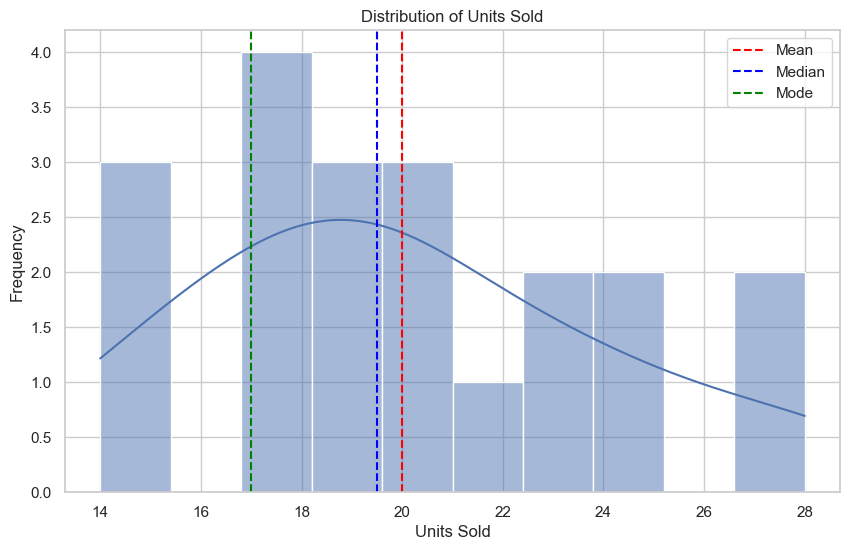

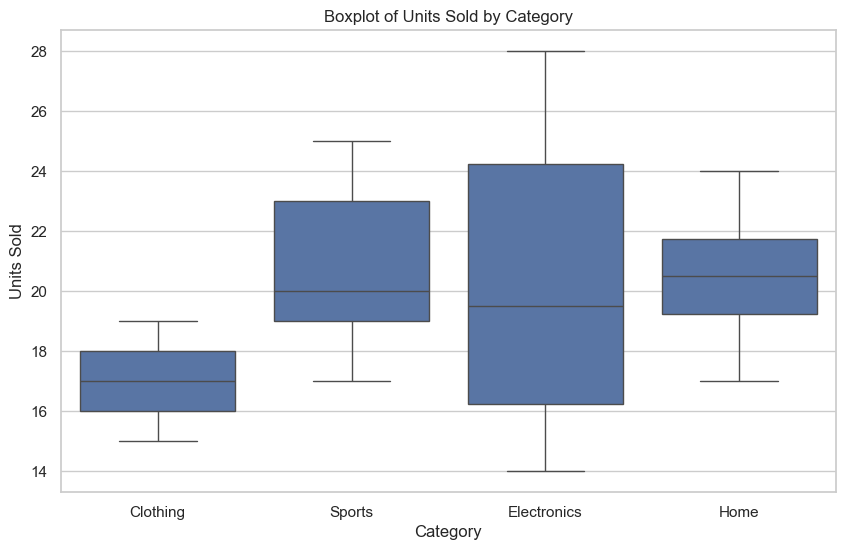

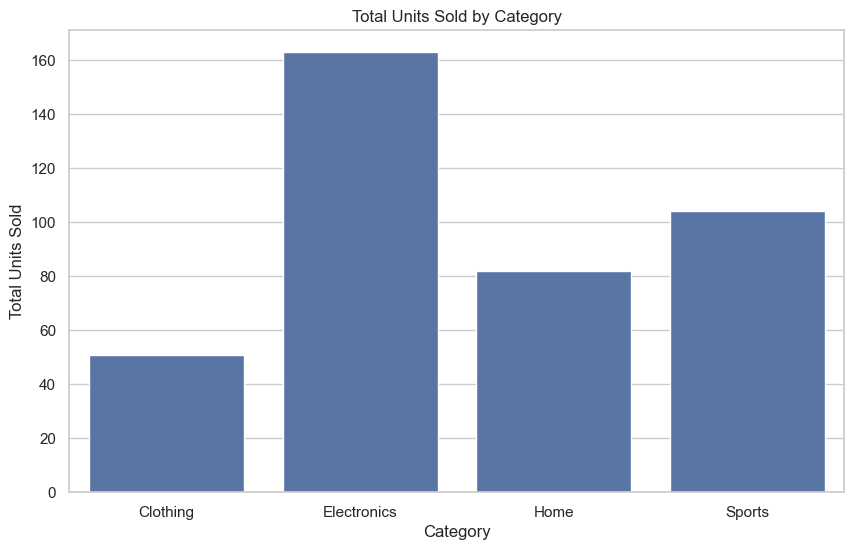

In [9]:
# Visualizations
sns.set(style="whitegrid")

# Plot distribution of units sold
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color='red', linestyle='--', label='Mean')
plt.axvline(median_sales, color='blue', linestyle='--', label='Median')
plt.axvline(mode_sales, color='green', linestyle='--', label='Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

# Bar plot for total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Units Sold', data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()
